# Notebook support in Sherpa

A number of objects have been updated to support HTML output when displayed in a Jupyter notebook. Let's take a quick tour!

First we have the data objects:

In [1]:
import numpy as np

from sherpa.data import Data1D, Data1DInt, Data2D

x = np.arange(100, 200, 20)
y = np.asarray([120, 240, 30, 95, 130])

d1 = Data1D('oned', x, y)
d1i = Data1DInt('onedint', x[:-1], x[1:], y[:-1])
               
x0 = np.asarray([150, 250, 100])
x1 = np.asarray([250, 200, 200])
y2 = np.asarray([50, 40, 70])
d2 = Data2D('twod', x0, x1, y2)      

Each can be displayed with `print`, which shows a textual representation of attribute and values:

In [2]:
print(d1)

name      = oned
x         = Int64[5]
y         = Int64[5]
staterror = None
syserror  = None


Or they can be displayed as-is which, **in a Jupyter notebook**, will display either a plot or a HTML table. The `Data1D` and `Data1DInt` classes will dislay a plot (if the `pylab` plotting backend is selected), and the `Data2D` class a table.

In [3]:
d1

<Data1D data set instance 'oned'>

In [4]:
print(d1i)

name      = onedint
xlo       = Int64[4]
xhi       = Int64[4]
y         = Int64[4]
staterror = None
syserror  = None


In [5]:
d1i

<Data1DInt data set instance 'onedint'>

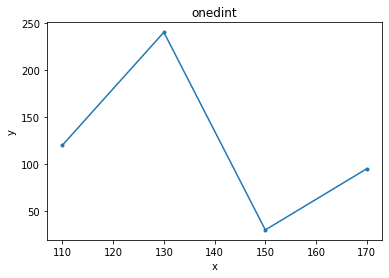

In [7]:
from sherpa.plot import DataPlot

dplot = DataPlot()
dplot.prepare(d1i)
dplot.plot(linestyle='-')